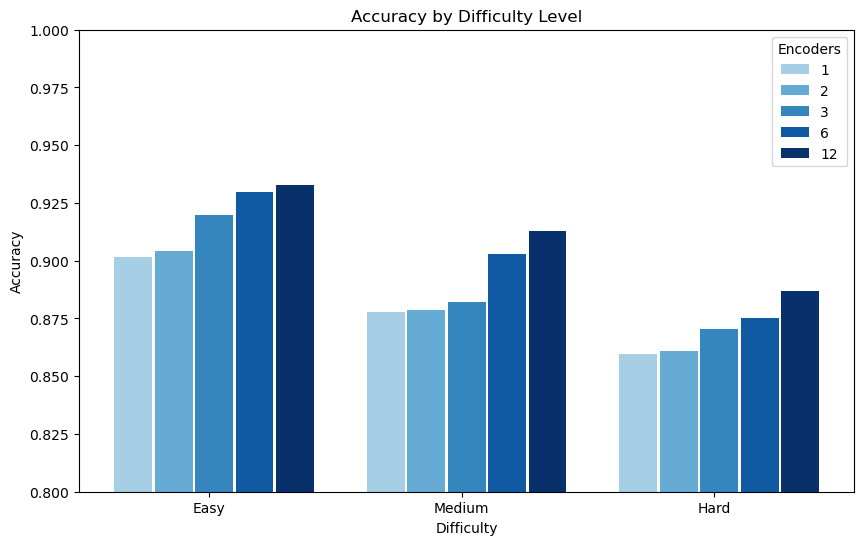

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Easy', 'Medium', 'Hard']
epochs = [1, 2, 3, 6,12]
scores = {
    1: [0.9015, 0.8776, 0.8597],
    2: [0.9042, 0.8785, 0.8611],
    3: [0.9197, 0.8822, 0.8703],
    6: [0.9299, 0.9029, 0.8754],
   12: [0.9328, 0.9129, 0.8868]
}

num_epochs = len(epochs)
bar_width = 0.15
space = 0.01

x = np.arange(len(categories))

# Generate color gradient
colors = plt.cm.Blues(np.linspace(0.35, 1, num_epochs))

# Plotting the bar plots
plt.figure(figsize=(10, 6))

for i, epoch in enumerate(epochs):
    plt.bar(x + i * (bar_width + space), scores[epoch], width=bar_width, label=f'{epoch}', color=colors[i])

plt.xlabel('Difficulty')
plt.ylabel('Accuracy')
plt.title('Accuracy by Difficulty Level')
plt.xticks(x + bar_width * (num_epochs - 1) / 2, categories)
plt.legend(title='Encoders')
plt.ylim(0.8, 1)

plt.show()

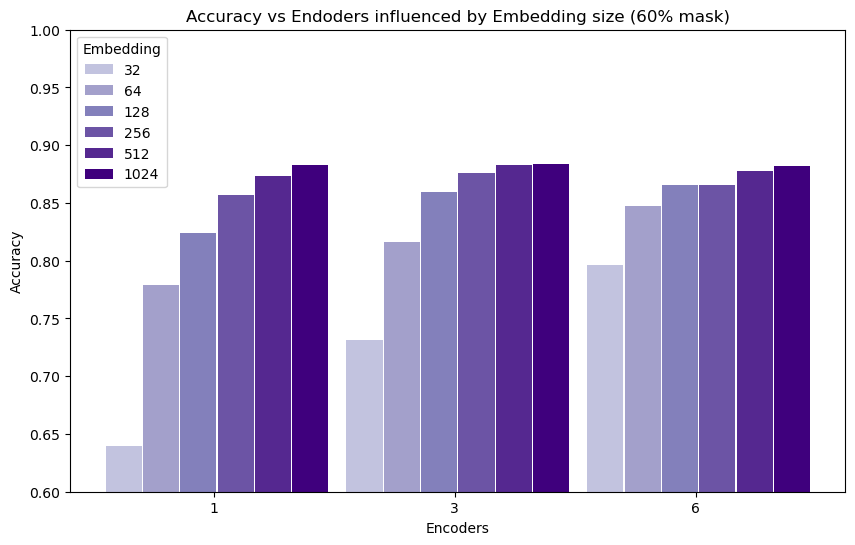

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['1', '3', '6']
epochs = [32,64, 128, 256, 512, 1024]
scores = {
    32: [0.6395, 0.7314, 0.7960],
    64: [0.7792, 0.8160, 0.8476],
    128: [0.8241, 0.8595, 0.8653],
    256: [0.8572, 0.8760, 0.8655],
    512: [0.8732, 0.8830, 0.8773],
    1024: [0.8830, 0.8841, 0.8821]
}

num_epochs = len(epochs)
bar_width = 0.15
space = 0.005

x = np.arange(len(categories))

# Generate color gradient
colors = plt.cm.Purples(np.linspace(0.35, 1, num_epochs))

# Plotting the bar plots
plt.figure(figsize=(10, 6))

for i, epoch in enumerate(epochs):
    plt.bar(x + i * (bar_width + space), scores[epoch], width=bar_width, label=f'{epoch}', color=colors[i])

plt.xlabel('Encoders')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Endoders influenced by Embedding size (60% mask)')
plt.xticks(x + bar_width * (num_epochs - 1) / 2, categories)
plt.legend(title='Embedding')
plt.ylim(0.6, 1)

plt.show()

In [16]:
ab_list = open("antibiotic_list_classes.txt","r")
ab_list = ab_list.read().splitlines()

# Create a dictionary to store the indices for each group
group_indices = {}

for index, item in enumerate(ab_list):
    # Split the item into antibiotic and group
    antibiotic, group = item.split('=')
    # If the group is already in the dictionary, append the index to its list
    if group in group_indices:
        group_indices[group].append(index)
    # If the group is not in the dictionary, create a new list with the index
    else:
        group_indices[group] = [index]

# Print the dictionary
for group, indices in group_indices.items():
    print(f"{group}: {indices}")

Penicillins: [0, 1]
Others: [2, 10, 20]
Cephalosporins: [3, 4, 5, 6, 7, 8, 9]
Quinolones: [11, 15]
Carbapenems: [12, 14, 16]
Aminoglycosides: [13, 17, 21]
Sulfonamides: [18, 19, 22, 23]


Experiment 1 Encoders

In [25]:
##data
import pandas as pd
#Sensitivity
OneEncEasyMask =[0.175, 0.8333333333333334, 0.6785714285714286, 0.8090452261306532, 0.13675213675213677, 1.0, 0.5789473684210527, 1.0, 0.6313131313131313, 0.8097560975609757, 0.20408163265306123, 0.8640350877192983, 0.0, 0.38926174496644295, 0.0, 0.9649122807017544, 0.0, 0.8433734939759037, 0.9761904761904762, 0.7828947368421053, 0.84765625, 0.0, 0.6875, 0.757847533632287]
OneEncMedMask = [0.0, 0.7844202898550725, 0.6428571428571429, 0.7336683417085427, 0.1282051282051282, 1.0, 0.21929824561403508, 1.0, 0.6060606060606061, 0.6682926829268293, 0.0, 0.793859649122807, 0.0, 0.3087248322147651, 0.0, 0.9181286549707602, 0.0, 0.7891566265060241, 0.9523809523809523, 0.7828947368421053, 0.818359375, 0.0, 0.59375, 0.7354260089686099]
OneEncHardMask = [0.0, 0.7644927536231884, 0.4642857142857143, 0.7487437185929648, 0.0, 1.0, 0.08771929824561403, 1.0, 0.4595959595959596, 0.7024390243902439, 0.0, 0.7587719298245614, 0.0, 0.026845637583892617, 0.0, 0.9415204678362573, 0.0, 0.6265060240963856, 1.0, 0.5197368421052632, 0.72265625, 0.0, 0.78125, 0.6278026905829597]

TwoEncEasyMask = [0.3125, 0.8568840579710145, 0.7678571428571429, 0.7788944723618091, 0.36752136752136755, 1.0, 0.5614035087719298, 1.0, 0.7575757575757576, 0.824390243902439, 0.2857142857142857, 0.8859649122807017, 0.0, 0.5838926174496645, 0.0, 0.9707602339181286, 0.0, 0.8855421686746988, 1.0, 0.8092105263157895, 0.861328125, 0.6341463414634146, 0.84375, 0.7533632286995515]
TwoEncMedMask = [0.1625, 0.8278985507246377, 0.6785714285714286, 0.7638190954773869, 0.3247863247863248, 0.9935064935064936, 0.5263157894736842, 0.8888888888888888, 0.6717171717171717, 0.7463414634146341, 0.30612244897959184, 0.8464912280701754, 0.0, 0.4429530201342282, 0.0, 0.9415204678362573, 0.0, 0.8012048192771084, 1.0, 0.7368421052631579, 0.83984375, 0.5609756097560976, 0.96875, 0.7354260089686099]
TwoEncHardMask = [0.0, 0.7518115942028986, 0.44642857142857145, 0.7336683417085427, 0.03418803418803419, 1.0, 0.20175438596491227, 1.0, 0.5151515151515151, 0.7024390243902439, 0.04081632653061224, 0.7324561403508771, 0.0, 0.026845637583892617, 0.0, 0.9122807017543859, 0.0, 0.608433734939759, 1.0, 0.5460526315789473, 0.705078125, 0.0, 0.84375, 0.5695067264573991]

ThreeEncEasyMask =[0.35, 0.8369565217391305, 0.75, 0.7738693467336684, 0.5128205128205128, 1.0, 0.5877192982456141, 1.0, 0.7525252525252525, 0.7902439024390244, 0.5306122448979592, 0.8991228070175439, 0.0, 0.5906040268456376, 0.0, 0.9532163742690059, 0.0, 0.8674698795180723, 0.9761904761904762, 0.8421052631578947, 0.849609375, 0.6097560975609756, 1.0, 0.7757847533632287]
ThreeEncMedMask =[0.1875, 0.8496376811594203, 0.7678571428571429, 0.7738693467336684, 0.36752136752136755, 1.0, 0.5263157894736842, 1.0, 0.6767676767676768, 0.7902439024390244, 0.3469387755102041, 0.8552631578947368, 0.0, 0.348993288590604, 0.0, 0.9415204678362573, 0.0, 0.8072289156626506, 0.9761904761904762, 0.75, 0.833984375, 0.5121951219512195, 0.90625, 0.7130044843049327]
ThreeEncHardMask =[0.0, 0.7608695652173914, 0.5535714285714286, 0.7035175879396985, 0.06837606837606838, 1.0, 0.37719298245614036, 0.9629629629629629, 0.5656565656565656, 0.6634146341463415, 0.1836734693877551, 0.7675438596491229, 0.0, 0.18791946308724833, 0.0, 0.8654970760233918, 0.0, 0.6566265060240963, 0.9047619047619048, 0.6513157894736842, 0.7109375, 0.1951219512195122, 0.84375, 0.6502242152466368]

SixEncEasyMask =[0.3875, 0.8387681159420289, 0.7678571428571429, 0.7487437185929648, 0.5384615384615384, 0.9935064935064936, 0.631578947368421, 0.9629629629629629, 0.7474747474747475, 0.8195121951219512, 0.5510204081632653, 0.8991228070175439, 0.0, 0.5973154362416108, 0.14285714285714285, 0.9649122807017544, 0.0, 0.9096385542168675, 0.9761904761904762, 0.8486842105263158, 0.865234375, 0.5365853658536586, 0.90625, 0.7982062780269058]
SixEncMedMask =[0.275, 0.8315217391304348, 0.7142857142857143, 0.7185929648241206, 0.38461538461538464, 0.9935064935064936, 0.41228070175438597, 0.9629629629629629, 0.5959595959595959, 0.7317073170731707, 0.4489795918367347, 0.8421052631578947, 0.0, 0.40268456375838924, 0.0, 0.9298245614035088, 0.0, 0.8132530120481928, 0.9523809523809523, 0.756578947368421, 0.7734375, 0.6097560975609756, 0.96875, 0.695067264573991]
SixEncHardMask =[0.0125, 0.7771739130434783, 0.6071428571428571, 0.6683417085427136, 0.07692307692307693, 1.0, 0.37719298245614036, 1.0, 0.5151515151515151, 0.6195121951219512, 0.30612244897959184, 0.7456140350877193, 0.0, 0.087248322147651, 0.0, 0.9005847953216374, 0.0, 0.6566265060240963, 0.9761904761904762, 0.6513157894736842, 0.748046875, 0.36585365853658536, 0.90625, 0.6053811659192825]

TwelveEncEasyMask =[0.3625, 0.8478260869565217, 0.6785714285714286, 0.7135678391959799, 0.5555555555555556, 0.974025974025974, 0.5701754385964912, 0.9259259259259259, 0.7222222222222222, 0.7804878048780488, 0.6122448979591837, 0.8728070175438597, 0.15384615384615385, 0.7449664429530202, 0.2857142857142857, 0.9122807017543859, 0.42857142857142855, 0.8554216867469879, 0.9761904761904762, 0.8947368421052632, 0.849609375, 0.7073170731707317, 0.875, 0.7937219730941704]
TwelveEncMedMask =[0.1875, 0.7862318840579711, 0.5892857142857143, 0.678391959798995, 0.2222222222222222, 0.9675324675324676, 0.4824561403508772, 0.8888888888888888, 0.5151515151515151, 0.6682926829268293, 0.3877551020408163, 0.8070175438596491, 0.07692307692307693, 0.40268456375838924, 0.14285714285714285, 0.9005847953216374, 0.14285714285714285, 0.8072289156626506, 0.9523809523809523, 0.7894736842105263, 0.806640625, 0.34146341463414637, 1.0, 0.726457399103139]
TwelveEncHardMask = [0.05, 0.7409420289855072, 0.625, 0.6683417085427136, 0.23931623931623933, 0.9935064935064936, 0.3157894736842105, 1.0, 0.5303030303030303, 0.6097560975609756, 0.2857142857142857, 0.75, 0.0, 0.2751677852348993, 0.0, 0.8654970760233918, 0.0, 0.7168674698795181, 0.9523809523809523, 0.6710526315789473, 0.728515625, 0.3902439024390244, 0.84375, 0.6053811659192825]

data = {
    'OneEncEasyMask': OneEncEasyMask,
    'TwoEncEasyMask': TwoEncEasyMask,
    'ThreeEncEasyMask': ThreeEncEasyMask,
    'SixEncEasyMask': SixEncEasyMask,
    'TwelveEncEasyMask': TwelveEncEasyMask
}

sensitivity = pd.DataFrame(data)
print(sensitivity)


    OneEncEasyMask  TwoEncEasyMask  ThreeEncEasyMask  SixEncEasyMask  \
0         0.175000        0.312500          0.350000        0.387500   
1         0.833333        0.856884          0.836957        0.838768   
2         0.678571        0.767857          0.750000        0.767857   
3         0.809045        0.778894          0.773869        0.748744   
4         0.136752        0.367521          0.512821        0.538462   
5         1.000000        1.000000          1.000000        0.993506   
6         0.578947        0.561404          0.587719        0.631579   
7         1.000000        1.000000          1.000000        0.962963   
8         0.631313        0.757576          0.752525        0.747475   
9         0.809756        0.824390          0.790244        0.819512   
10        0.204082        0.285714          0.530612        0.551020   
11        0.864035        0.885965          0.899123        0.899123   
12        0.000000        0.000000          0.000000        0.00

In [13]:
import pandas as pd
#Specificity 
OneEncEasyMask =[0.9989235737351991, 0.8806646525679759, 0.8960396039603961, 0.8317757009345794, 0.9794776119402985, 0.0, 0.9322533136966127, 0.08333333333333333, 0.8336798336798337, 0.8966986155484558, 0.9916107382550335, 0.9819458375125376, 1.0, 0.9837320574162679, 1.0, 0.9461538461538461, 1.0, 0.9164619164619164, 0.4838709677419355, 0.943127962085308, 0.8700906344410876, 1.0, 0.7073170731707317, 0.9316427783902976]
OneEncMedMask = [1.0, 0.7628398791540786, 0.9183168316831684, 0.7850467289719626, 0.9794776119402985, 0.0, 0.9263622974963182, 0.0, 0.8128898128898129, 0.8977635782747604, 1.0, 0.9859578736208626, 1.0, 0.9607655502392345, 1.0, 0.9461538461538461, 1.0, 0.9213759213759214, 0.5483870967741935, 0.8981042654028436, 0.7719033232628398, 1.0, 0.8048780487804879, 0.9305402425578831]
OneEncHardMask = [1.0, 0.6842900302114804, 0.9405940594059405, 0.7725856697819314, 1.0, 0.0, 0.9646539027982327, 0.08333333333333333, 0.8586278586278586, 0.8775292864749734, 1.0, 0.9689067201604814, 1.0, 0.9913875598086125, 1.0, 0.8692307692307693, 1.0, 0.9213759213759214, 0.5161290322580645, 0.9265402843601895, 0.702416918429003, 1.0, 0.7804878048780488, 0.9338478500551268]

TwoEncEasyMask = [0.9967707212055974, 0.7749244712990937, 0.9158415841584159, 0.8193146417445483, 0.9458955223880597, 0.0, 0.9572901325478645, 0.25, 0.8794178794178794, 0.9158679446219382, 0.9848993288590604, 0.9809428284854563, 1.0, 0.9732057416267943, 1.0, 0.9487179487179487, 1.0, 0.9066339066339066, 0.5806451612903226, 0.8909952606635071, 0.7885196374622356, 0.983402489626556, 0.6829268292682927, 0.9426681367144433]
TwoEncMedMask = [0.9989235737351991, 0.649546827794562, 0.9257425742574258, 0.6635514018691588, 0.9253731343283582, 0.0, 0.9057437407952872, 0.3333333333333333, 0.8108108108108109, 0.8487752928647497, 0.9848993288590604, 0.9729187562688064, 1.0, 0.9578947368421052, 1.0, 0.9205128205128205, 1.0, 0.9115479115479116, 0.7096774193548387, 0.8981042654028436, 0.8096676737160121, 0.9896265560165975, 0.7073170731707317, 0.9404630650496141]
TwoEncHardMask = [1.0, 0.7250755287009063, 0.9752475247524752, 0.6978193146417445, 0.996268656716418, 0.0, 0.9425625920471281, 0.0, 0.8232848232848233, 0.8839190628328009, 1.0, 0.9679037111334002, 1.0, 0.9971291866028709, 1.0, 0.8897435897435897, 1.0, 0.8329238329238329, 0.4838709677419355, 0.8009478672985783, 0.6797583081570997, 1.0, 0.7560975609756098, 0.9294377067254685]

ThreeEncEasyMask =[0.9946178686759957, 0.8821752265861027, 0.9381188118811881, 0.8566978193146417, 0.9197761194029851, 0.0625, 0.9484536082474226, 0.25, 0.9085239085239085, 0.9329073482428115, 0.9714765100671141, 0.9829488465396189, 1.0, 0.968421052631579, 1.0, 0.9717948717948718, 1.0, 0.9484029484029484, 0.7419354838709677, 0.9218009478672986, 0.8972809667673716, 0.9771784232365145, 0.7560975609756098, 0.948180815876516]
ThreeEncMedMask =[0.9978471474703983, 0.6722054380664653, 0.9455445544554455, 0.7819314641744548, 0.9402985074626866, 0.0, 0.9278350515463918, 0.08333333333333333, 0.7775467775467776, 0.7912673056443025, 0.9815436241610739, 0.9719157472417251, 1.0, 0.970334928229665, 1.0, 0.9333333333333333, 1.0, 0.7813267813267813, 0.6451612903225806, 0.7180094786729858, 0.7462235649546828, 0.9896265560165975, 0.6341463414634146, 0.9228224917309813]
ThreeEncHardMask =[1.0, 0.6993957703927492, 0.9356435643564357, 0.7850467289719626, 0.9813432835820896, 0.03125, 0.9381443298969072, 0.0, 0.8378378378378378, 0.9158679446219382, 0.9932885906040269, 0.970912738214644, 1.0, 0.9626794258373206, 1.0, 0.9256410256410257, 1.0, 0.773955773955774, 0.5161290322580645, 0.7819905213270142, 0.6374622356495468, 0.9937759336099585, 0.6585365853658537, 0.9514884233737596]

SixEncEasyMask = [0.9956942949407965, 0.9335347432024169, 0.9752475247524752, 0.8660436137071651, 0.9384328358208955, 0.15625, 0.9631811487481591, 0.6666666666666666, 0.9355509355509356, 0.9552715654952076, 0.9798657718120806, 0.9819458375125376, 1.0, 0.9789473684210527, 1.0, 0.9666666666666667, 1.0, 0.9533169533169533, 0.7741935483870968, 0.9123222748815166, 0.9335347432024169, 0.9771784232365145, 0.8292682926829268, 0.9658213891951488]
SixEncMedMask =[0.9967707212055974, 0.7205438066465257, 0.948019801980198, 0.8660436137071651, 0.9440298507462687, 0.03125, 0.9528718703976435, 0.16666666666666666, 0.9168399168399168, 0.9510117145899893, 0.9848993288590604, 0.9799398194583752, 1.0, 0.9799043062200957, 1.0, 0.9615384615384616, 1.0, 0.9385749385749386, 0.8709677419354839, 0.9502369668246445, 0.9033232628398792, 0.979253112033195, 0.7560975609756098, 0.960308710033076]
SixEncHardMask =[1.0, 0.7190332326283988, 0.9455445544554455, 0.8348909657320872, 0.9888059701492538, 0.0, 0.9322533136966127, 0.0, 0.8669438669438669, 0.9265175718849841, 0.9916107382550335, 0.9729187562688064, 1.0, 0.9837320574162679, 1.0, 0.9179487179487179, 1.0, 0.9557739557739557, 0.7096774193548387, 0.919431279620853, 0.7129909365558912, 0.979253112033195, 0.7804878048780488, 0.958103638368247]

TwelveEncEasyMask =[0.9935414424111948, 0.9093655589123867, 0.9727722772277227, 0.9003115264797508, 0.9328358208955224, 0.34375, 0.9543446244477173, 0.75, 0.9459459459459459, 0.972310969116081, 0.9865771812080537, 0.9919759277833501, 0.998389694041868, 0.969377990430622, 1.0, 0.9794871794871794, 1.0, 0.9557739557739557, 0.9032258064516129, 0.957345971563981, 0.9516616314199395, 0.991701244813278, 0.8536585365853658, 0.9724366041896362]
TwelveEncMedMask =[0.9978471474703983, 0.9093655589123867, 0.9678217821782178, 0.8878504672897196, 0.9645522388059702, 0.125, 0.9528718703976435, 0.9166666666666666, 0.9584199584199584, 0.9680511182108626, 0.9916107382550335, 0.9849548645937813, 1.0, 0.9904306220095693, 1.0, 0.9692307692307692, 1.0, 0.9656019656019657, 0.8709677419354839, 0.9478672985781991, 0.9169184290030211, 0.9854771784232366, 0.8292682926829268, 0.9713340683572216]
TwelveEncHardMask =[0.9989235737351991, 0.8761329305135952, 0.9579207920792079, 0.8566978193146417, 0.9552238805970149, 0.03125, 0.9440353460972017, 0.4166666666666667, 0.8690228690228691, 0.9307774227902024, 0.9815436241610739, 0.9769307923771314, 1.0, 0.9760765550239234, 1.0, 0.9564102564102565, 1.0, 0.9312039312039312, 0.8387096774193549, 0.9241706161137441, 0.8731117824773413, 0.979253112033195, 0.7804878048780488, 0.960308710033076]

# data = {
#     'OneEncEasyMask': OneEncEasyMask,
#     'OneEncMedMask': OneEncMedMask,
#     'OneEncHardMask': OneEncHardMask,
#     'TwoEncEasyMask': TwoEncEasyMask,
#     'TwoEncMedMask': TwoEncMedMask,
#     'TwoEncHardMask': TwoEncHardMask,
#     'ThreeEncEasyMask': ThreeEncEasyMask,
#     'ThreeEncMedMask': ThreeEncMedMask,
#     'ThreeEncHardMask': ThreeEncHardMask,
#     'SixEncEasyMask': SixEncEasyMask,
#     'SixEncMedMask': SixEncMedMask,
#     'SixEncHardMask': SixEncHardMask,
#     'TwelveEncEasyMask': TwelveEncEasyMask,
#     'TwelveEncMedMask': TwelveEncMedMask,
#     'TwelveEncHardMask': TwelveEncHardMask
# }

data = {
    'OneEncMedMask': OneEncMedMask,
    'TwoEncMedMask': TwoEncMedMask,
    'ThreeEncMedMask': ThreeEncMedMask,
    'SixEncMedMask': SixEncMedMask,
    'TwelveEncMedMask': TwelveEncMedMask
    }

specificity = pd.DataFrame(data)
print(specificity)

    OneEncMedMask  TwoEncMedMask  ThreeEncMedMask  SixEncMedMask  \
0        1.000000       0.998924         0.997847       0.996771   
1        0.762840       0.649547         0.672205       0.720544   
2        0.918317       0.925743         0.945545       0.948020   
3        0.785047       0.663551         0.781931       0.866044   
4        0.979478       0.925373         0.940299       0.944030   
5        0.000000       0.000000         0.000000       0.031250   
6        0.926362       0.905744         0.927835       0.952872   
7        0.000000       0.333333         0.083333       0.166667   
8        0.812890       0.810811         0.777547       0.916840   
9        0.897764       0.848775         0.791267       0.951012   
10       1.000000       0.984899         0.981544       0.984899   
11       0.985958       0.972919         0.971916       0.979940   
12       1.000000       1.000000         1.000000       1.000000   
13       0.960766       0.957895         0.97033

In [14]:
specificity_df = pd.DataFrame(specificity)
sensitivity_df = pd.DataFrame(sensitivity)


# Function to calculate F1 score
def calculate_f1_score(sensitivity, specificity):
    precision = sensitivity
    recall = specificity
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

# Calculate F1 score for each element
f1_score_df = pd.DataFrame(index=specificity_df.index, columns=specificity_df.columns)

for index, row in specificity_df.iterrows():
    for col in specificity_df.columns:
        sensitivity = sensitivity_df.at[index, col]
        specificity = row[col]
        f1_score = calculate_f1_score(sensitivity, specificity)
        f1_score_df.at[index, col] = f1_score

print("F1 Score DataFrame:")
print(f1_score_df)

F1 Score DataFrame:
   OneEncMedMask TwoEncMedMask ThreeEncMedMask SixEncMedMask TwelveEncMedMask
0            0.0      0.279528        0.315682      0.431071         0.315682
1        0.77348      0.727958        0.750578      0.772065         0.843328
2       0.756285      0.783117        0.847487       0.81472         0.732542
3       0.758488      0.710164         0.77788      0.785458         0.769115
4       0.226733      0.480816        0.528482      0.546554         0.361223
5            0.0           0.0             0.0      0.060594         0.221397
6       0.354642      0.665765        0.671642      0.575541         0.640577
7            0.0      0.484848        0.153846      0.284153         0.902564
8       0.694401      0.734739        0.723665      0.722369         0.670115
9       0.766216      0.794269        0.790755      0.827069         0.790716
10           0.0      0.467072        0.512669      0.616788         0.557506
11      0.879542      0.905312        0.9098

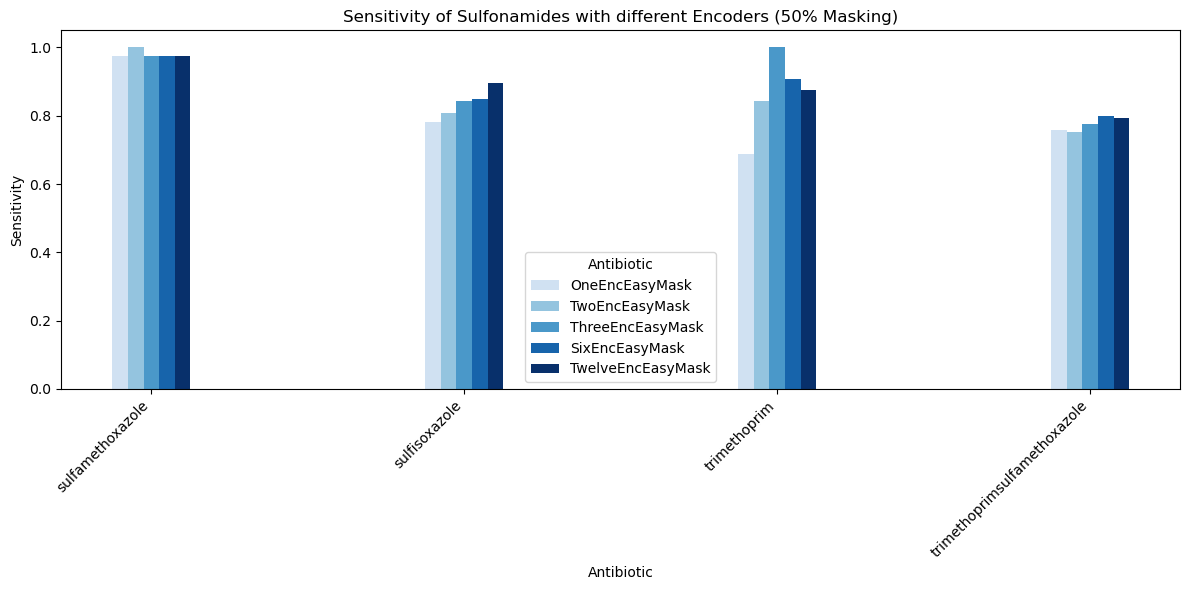

In [34]:
import matplotlib.pyplot as plt
import numpy as np

ab_list = open("antibiotic_list.txt","r")
ab_list = ab_list.read().splitlines()


selected_group = 'Sulfonamides'
mode = False # Set to False to plot sensitivity, True to plot specificity

if mode:
    df = specificity
    type = 'Specificity'
else :
    df = sensitivity
    type = 'Sensitivity'
# df = f1_score_df
# type = 'F1'
selected_rows = group_indices[selected_group]

selected_data = df.iloc[selected_rows]

df_transposed = selected_data.T

antibiotic_names = [ab_list[i] for i in selected_rows]

# Plotting
plt.figure(figsize=(12, 6))

# Define the positions of each group of bars
positions = np.arange(len(df_transposed.columns))

# Define the width of each bar
bar_width = 0.05  # Adjust the width here

# Generate color gradients for each group
num_groups = len(df_transposed)
colors = [plt.cm.Blues(i / num_groups + 0.2) for i in range(num_groups)]  # Adjust the start value here

# Iterate through each row (antibiotic) and plot its bars with different colors
for i, (antibiotic, row) in enumerate(df_transposed.iterrows()):
    plt.bar(positions + i * bar_width, row, width=bar_width, label=antibiotic, color=colors[i])

plt.xlabel('Antibiotic')
plt.ylabel(type)
plt.title(type+' of '+selected_group+' with different Encoders (50% Masking)')
plt.xticks(positions + (num_groups - 1) * bar_width / 2, antibiotic_names, rotation=45, ha='right')
plt.legend(title='Antibiotic')
plt.tight_layout()
plt.show()

Experiment 2 Embedding

In [36]:
##data
import pandas as pd
#Sensitivity
Emb32 = [0.0, 0.697463768115942, 0.017857142857142856, 0.9949748743718593, 0.017094017094017096, 0.2662337662337662, 0.07017543859649122, 0.6666666666666666, 0.9747474747474747, 0.02926829268292683, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7426900584795322, 0.0, 0.0, 0.40476190476190477, 0.0, 0.1875, 0.0, 0.78125, 0.0]
Emb64 =[0.0, 0.8768115942028986, 0.23214285714285715, 0.7085427135678392, 0.0, 0.987012987012987, 0.0, 0.8518518518518519, 0.005050505050505051, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006024096385542169, 0.23809523809523808, 0.14473684210526316, 0.751953125, 0.0, 1.0, 0.0]
Emb128 = [0.0, 0.7047101449275363, 0.017857142857142856, 0.6934673366834171, 0.0, 1.0, 0.24561403508771928, 1.0, 0.43434343434343436, 0.6292682926829268, 0.0, 0.6096491228070176, 0.0, 0.0, 0.0, 0.43859649122807015, 0.0, 0.27710843373493976, 0.8571428571428571, 0.4407894736842105, 0.642578125, 0.0, 0.0625, 0.547085201793722]
Emb256 = [0.0, 0.7554347826086957, 0.5357142857142857, 0.6532663316582915, 0.02564102564102564, 1.0, 0.30701754385964913, 0.8888888888888888, 0.4444444444444444, 0.6585365853658537, 0.061224489795918366, 0.7368421052631579, 0.0, 0.06040268456375839, 0.0, 0.8947368421052632, 0.0, 0.7228915662650602, 0.9761904761904762, 0.6842105263157895, 0.744140625, 0.0, 0.78125, 0.6098654708520179]
Emb512 = [0.15, 0.8115942028985508, 0.7142857142857143, 0.7487437185929648, 0.24786324786324787, 0.9935064935064936, 0.30701754385964913, 0.9629629629629629, 0.5959595959595959, 0.7414634146341463, 0.2857142857142857, 0.7982456140350878, 0.0, 0.31543624161073824, 0.0, 0.9181286549707602, 0.0, 0.7409638554216867, 0.9761904761904762, 0.7039473684210527, 0.7734375, 0.34146341463414637, 0.90625, 0.6412556053811659]
Emb1024 = [0.2, 0.7898550724637681, 0.6428571428571429, 0.7738693467336684, 0.42735042735042733, 1.0, 0.41228070175438597, 0.8888888888888888, 0.5656565656565656, 0.7024390243902439, 0.4897959183673469, 0.7850877192982456, 0.0, 0.38926174496644295, 0.0, 0.9298245614035088, 0.0, 0.7951807228915663, 0.9523809523809523, 0.7368421052631579, 0.794921875, 0.5121951219512195, 0.90625, 0.7130044843049327]

data = {
    'Emb32' : Emb32,
    'Emb64' : Emb64,
    'Emb128' : Emb128,
    'Emb256' : Emb256,
    'Emb512' : Emb512,
    'Emb1024': Emb1024
    }
sensitivity = pd.DataFrame(data)
print(sensitivity)


       Emb32     Emb64    Emb128    Emb256    Emb512   Emb1024
0   0.000000  0.000000  0.000000  0.000000  0.150000  0.200000
1   0.697464  0.876812  0.704710  0.755435  0.811594  0.789855
2   0.017857  0.232143  0.017857  0.535714  0.714286  0.642857
3   0.994975  0.708543  0.693467  0.653266  0.748744  0.773869
4   0.017094  0.000000  0.000000  0.025641  0.247863  0.427350
5   0.266234  0.987013  1.000000  1.000000  0.993506  1.000000
6   0.070175  0.000000  0.245614  0.307018  0.307018  0.412281
7   0.666667  0.851852  1.000000  0.888889  0.962963  0.888889
8   0.974747  0.005051  0.434343  0.444444  0.595960  0.565657
9   0.029268  0.000000  0.629268  0.658537  0.741463  0.702439
10  0.000000  0.000000  0.000000  0.061224  0.285714  0.489796
11  0.000000  0.000000  0.609649  0.736842  0.798246  0.785088
12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
13  0.000000  0.000000  0.000000  0.060403  0.315436  0.389262
14  0.000000  0.000000  0.000000  0.000000  0.000000  0

In [35]:
##data
import pandas as pd
#Specificity
Emb32 =[0.6006458557588805, 0.7039274924471299, 0.7945544554455446, 0.003115264797507788, 0.9664179104477612, 0.71875, 0.9396170839469808, 0.08333333333333333, 0.14345114345114346, 0.8274760383386581, 0.9966442953020134, 1.0, 0.9677938808373591, 0.9473684210526315, 1.0, 0.3153846153846154, 0.9991596638655462, 1.0, 0.3870967741935484, 1.0, 0.7915407854984894, 0.91701244813278, 0.24390243902439024, 1.0]
Emb64 =[1.0, 0.5785498489425982, 0.9777227722772277, 0.632398753894081, 1.0, 0.0, 1.0, 0.16666666666666666, 0.9563409563409564, 1.0, 1.0, 1.0, 0.8405797101449275, 1.0, 1.0, 1.0, 1.0, 0.995085995085995, 0.16129032258064516, 0.976303317535545, 0.6646525679758308, 0.9979253112033195, 0.0, 1.0]
Emb128 =[1.0, 0.8534743202416919, 1.0, 0.8286604361370716, 1.0, 0.0, 0.9263622974963182, 0.16666666666666666, 0.8544698544698545, 0.8913738019169329, 1.0, 0.9739217652958877, 1.0, 1.0, 1.0, 0.9871794871794872, 1.0, 0.9901719901719902, 0.1935483870967742, 0.9644549763033176, 0.824773413897281, 1.0, 0.975609756097561, 0.9636163175303197]
Emb256 = [1.0, 0.8444108761329305, 0.9579207920792079, 0.822429906542056, 0.9944029850746269, 0.0, 0.9484536082474226, 0.25, 0.8232848232848233, 0.9030883919062833, 0.9983221476510067, 0.9638916750250752, 1.0, 0.9913875598086125, 1.0, 0.8948717948717949, 1.0, 0.9238329238329238, 0.8064516129032258, 0.9265402843601895, 0.8262839879154078, 1.0, 0.7804878048780488, 0.9558985667034179]
Emb512 = [0.9989235737351991, 0.6435045317220544, 0.943069306930693, 0.838006230529595, 0.9701492537313433, 0.0, 0.9528718703976435, 0.08333333333333333, 0.8440748440748441, 0.9222577209797657, 0.9832214765100671, 0.9739217652958877, 1.0, 0.9645933014354067, 1.0, 0.9256410256410257, 1.0, 0.914004914004914, 0.6774193548387096, 0.909952606635071, 0.851963746223565, 0.9937759336099585, 0.7073170731707317, 0.9525909592061742]
Emb1024 = [0.9967707212055974, 0.7341389728096677, 0.9603960396039604, 0.7538940809968847, 0.9421641791044776, 0.09375, 0.9366715758468336, 0.4166666666666667, 0.841995841995842, 0.8977635782747604, 0.9848993288590604, 0.9759277833500501, 1.0, 0.970334928229665, 1.0, 0.9487179487179487, 1.0, 0.7985257985257985, 0.7096774193548387, 0.8364928909952607, 0.729607250755287, 0.975103734439834, 0.8048780487804879, 0.9570011025358324]

data = {
    'Emb32' : Emb32,
    'Emb64' : Emb64,
    'Emb128' : Emb128,
    'Emb256' : Emb256,
    'Emb512' : Emb512,
    'Emb1024': Emb1024
    }
specificity = pd.DataFrame(data)
print(specificity)

       Emb32     Emb64    Emb128    Emb256    Emb512   Emb1024
0   0.600646  1.000000  1.000000  1.000000  0.998924  0.996771
1   0.703927  0.578550  0.853474  0.844411  0.643505  0.734139
2   0.794554  0.977723  1.000000  0.957921  0.943069  0.960396
3   0.003115  0.632399  0.828660  0.822430  0.838006  0.753894
4   0.966418  1.000000  1.000000  0.994403  0.970149  0.942164
5   0.718750  0.000000  0.000000  0.000000  0.000000  0.093750
6   0.939617  1.000000  0.926362  0.948454  0.952872  0.936672
7   0.083333  0.166667  0.166667  0.250000  0.083333  0.416667
8   0.143451  0.956341  0.854470  0.823285  0.844075  0.841996
9   0.827476  1.000000  0.891374  0.903088  0.922258  0.897764
10  0.996644  1.000000  1.000000  0.998322  0.983221  0.984899
11  1.000000  1.000000  0.973922  0.963892  0.973922  0.975928
12  0.967794  0.840580  1.000000  1.000000  1.000000  1.000000
13  0.947368  1.000000  1.000000  0.991388  0.964593  0.970335
14  1.000000  1.000000  1.000000  1.000000  1.000000  1

In [ ]:
specificity_df = pd.DataFrame(specificity)
sensitivity_df = pd.DataFrame(sensitivity)


# Function to calculate F1 score
def calculate_f1_score(sensitivity, specificity):
    precision = sensitivity
    recall = specificity
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

# Calculate F1 score for each element
f1_score_df = pd.DataFrame(index=specificity_df.index, columns=specificity_df.columns)

for index, row in specificity_df.iterrows():
    for col in specificity_df.columns:
        sensitivity = sensitivity_df.at[index, col]
        specificity = row[col]
        f1_score = calculate_f1_score(sensitivity, specificity)
        f1_score_df.at[index, col] = f1_score

print("F1 Score DataFrame:")
print(f1_score_df)

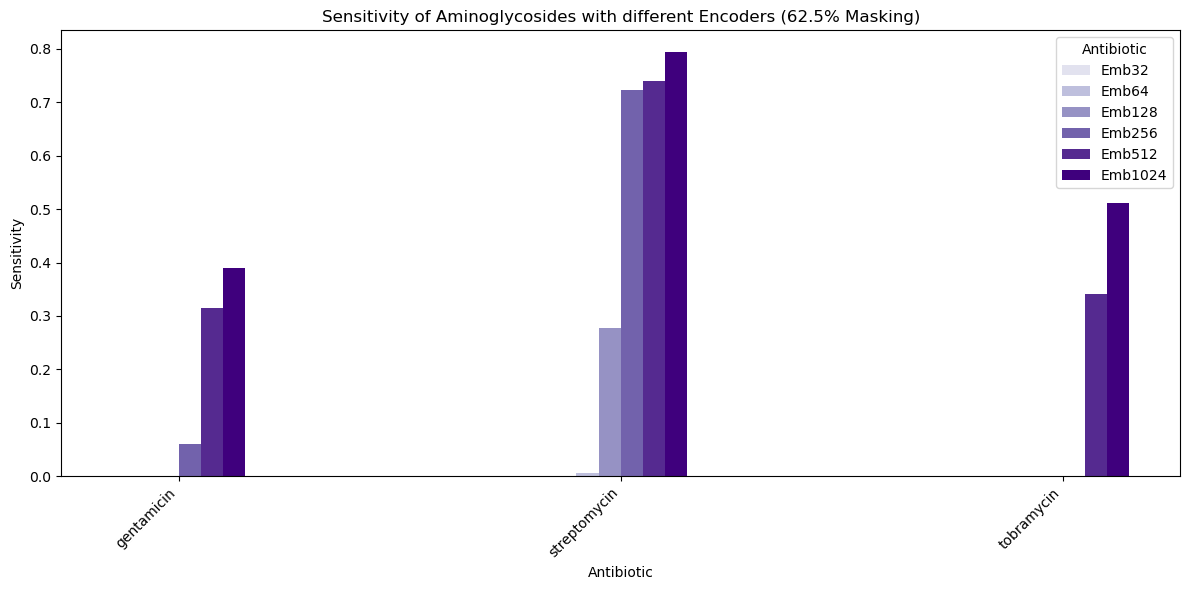

In [52]:
import matplotlib.pyplot as plt
import numpy as np

ab_list = open("antibiotic_list.txt","r")
ab_list = ab_list.read().splitlines()

selected_group = 'Aminoglycosides'
mode = False # Set to False to plot sensitivity, True to plot specificity

if mode:
    df = specificity
    type = 'Specificity'
else :
    df = sensitivity
    type = 'Sensitivity'
# df = f1_score_df
# type = 'F1'

selected_rows = group_indices[selected_group]

selected_data = df.iloc[selected_rows]

df_transposed = selected_data.T

antibiotic_names = [ab_list[i] for i in selected_rows]

# Plotting
plt.figure(figsize=(12, 6))

# Define the positions of each group of bars
positions = np.arange(len(df_transposed.columns))

# Define the width of each bar
bar_width = 0.05  # Adjust the width here

# Generate color gradients for each group
num_groups = len(df_transposed)
colors = [plt.cm.Purples(i / num_groups + 0.2) for i in range(num_groups)]  # Adjust the start value here

# Iterate through each row (antibiotic) and plot its bars with different colors
for i, (antibiotic, row) in enumerate(df_transposed.iterrows()):
    plt.bar(positions + i * bar_width, row, width=bar_width, label=antibiotic, color=colors[i])

plt.xlabel('Antibiotic')
plt.ylabel(type)
plt.title(type+' of '+selected_group+' with different Encoders (62.5% Masking)')
plt.xticks(positions + (num_groups - 1) * bar_width / 2, antibiotic_names, rotation=45, ha='right')
plt.legend(title='Antibiotic')
plt.tight_layout()
plt.show()